9. Training various popular neural networks (Resnet, VGGNet, Inception V3 etc) on custom Dataset.

In [8]:
# Step 1: Import Libraries
from tensorflow.keras.models import Model # Add this import statement
from tensorflow.keras.layers import Input, UpSampling2D, Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential # Import the Sequential class from Keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

In [2]:
# Step 2: Load and Preprocess Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:5000] # Select first 5000 samples
y_train = y_train[:5000]
X_test = X_test[:1000] # Select first 1000 samples
y_test = y_test[:1000]

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# Step 3: Resize images to meet the minimum input size of 32x32 pixels
X_train_resized = np.array([resize(img, (32, 32)) for img in X_train])
X_test_resized = np.array([resize(img, (32, 32)) for img in X_test])

In [4]:
# Step 4: Add a channel dimension to the resized images
X_train_resized = np.expand_dims(X_train_resized, axis=-1)
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

In [5]:
# Step 5: Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Step 6: # Define the ResNet50 model
resnet_model = Sequential([ResNet50(weights=None, input_shape=(32, 32,
1), classes=10)])
resnet_model.compile(optimizer=Adam(),
loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Step 7: Define the VGG16 model
input_shape = (32, 32, 1)
base_model = VGG16(weights=None, include_top=False,
input_shape=input_shape)

# Add custom classifier on top
x = UpSampling2D(size=(2, 2))(base_model.output) # Upsample to match input shape
x = UpSampling2D(size=(2, 2))(x) # Upsample again
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Combine base model and custom classifier
vgg_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
# Step 8: Define the InceptionV3 model
inception_input = Input(shape=(32, 32, 1))
x = UpSampling2D(size=(2, 2))(inception_input) # Upsample to match input shape
x = UpSampling2D(size=(2, 2))(x) # Upsample again
x = UpSampling2D(size=(2, 2))(x) # Upsample again (to match 75x75)
inception_output = InceptionV3(weights=None, include_top=False,
input_tensor=x, pooling='avg')

# Add custom classifier on top
x = Flatten()(inception_output.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Combine base model and custom classifier
inception_model = Model(inputs=inception_input, outputs=output)
inception_model.compile(optimizer=Adam(),
loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Step 9: Train the models
history_resnet = resnet_model.fit(X_train_resized, y_train,
epochs=5,batch_size=64, validation_data=(X_test_resized, y_test))
history_vgg = vgg_model.fit(X_train_resized, y_train, epochs=5,
batch_size=64, validation_data=(X_test_resized, y_test))
history_inception = inception_model.fit(X_train_resized, y_train,
epochs=5,batch_size=64, validation_data=(X_test_resized, y_test))

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 106s 415ms/step - accuracy: 0.5070 - loss: 2.3545 - val_accuracy: 0.0870 - val_loss: 2.5687
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.9237 - loss: 0.2529 - val_accuracy: 0.1160 - val_loss: 3.4429
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9380 - loss: 0.2058 - val_accuracy: 0.0940 - val_loss: 2.9759
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8368 - loss: 0.5227 - val_accuracy: 0.1160 - val_loss: 7.3268
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9730 - loss: 0.1004 - val_accuracy: 0.1660 - val_loss: 3.5242
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.1260 - val_loss: 2.2995
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1073 - loss: 2.3017 - val_accuracy: 0.1260 - val_loss: 2.2992
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.1105 - loss: 2.2997 - val_accuracy: 0.1260 - val

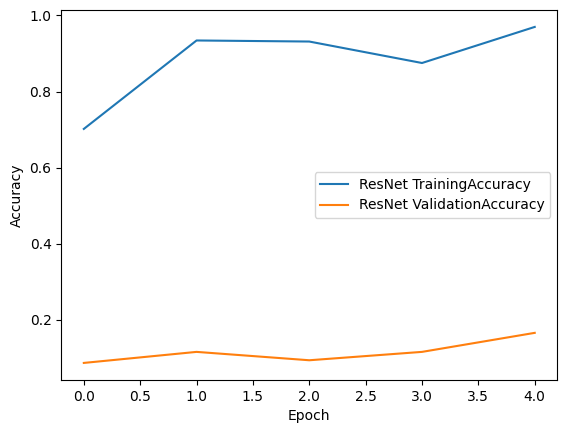

In [14]:
# Plot training and validation accuracy for ResNet
plt.plot(history_resnet.history['accuracy'], label='ResNet TrainingAccuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet ValidationAccuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

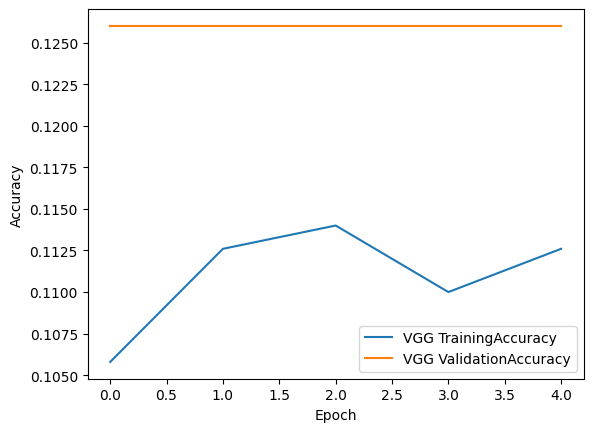

In [15]:
# Plot training and validation accuracy for VGG
plt.plot(history_vgg.history['accuracy'], label='VGG TrainingAccuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG ValidationAccuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

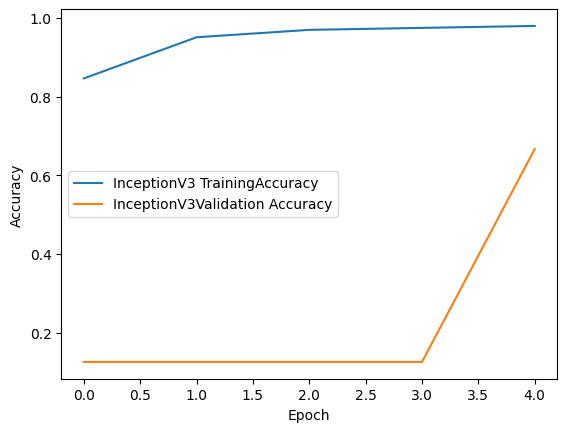

In [16]:
# Plot training and validation accuracy for InceptionV3
plt.plot(history_inception.history['accuracy'], label='InceptionV3 TrainingAccuracy')
plt.plot(history_inception.history['val_accuracy'],
label='InceptionV3Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()